In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd
import geopandas as gpd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
bigp = ['AL', 'BNP', 'Jamaat', 'JaPa']
mainp = ['AL', 'BNP']
years = [1991, 1996, 2001, 2008]

In [3]:
dfc = pd.read_csv('data/candidate_result.csv')
dfc.head()

,seat,year,party,name,votes,votes_pc,winner
0,Dhaka-3,2008,BNP,Gayeshwar Chandra Roy,70680.0,36.71,no
1,Dhaka-6,1991,Independent,Sayed Sharafat Hossain,8.0,0.01,no
2,Dhaka-6,1991,Jatiya Janata Party (Asad),Md. Afzalul Huq Afzal,9.0,0.01,no
3,Comilla-3,2001,Independent,Md. Ainul Haque,12.0,0.01,no
4,Dhaka-5,1991,Jatiyatabadi Gonotantrik Chashi Dal,Afzaluddin Chowdhury,14.0,0.01,no


In [4]:
dfc.shape

(8747, 7)

In [5]:
# only take 1991-2008 election data
dfc = dfc[dfc.year.isin(years)]
dfc.shape

(8183, 7)

In [6]:
# only take winners data
dfcwin = dfc[dfc.winner == 'yes']
dfcwin.head()

,seat,year,party,name,votes,votes_pc,winner
5411,Noakhali-3,1991,BNP,Salah Uddin Kamran,11378.0,22.23,yes
5749,Mymensingh-8,1991,JaPa,Khurram Khan Chowdhury,18209.0,24.68,yes
5805,Barguna-2,1991,Independent,Nurul Islam Moni,19616.0,28.41,yes
5860,Kurigram-3,1991,AL,Md. Amjad Hossain Talukdar,20547.0,23.74,yes
5896,Noakhali-1,1991,BNP,Zainul Abdin Farroque,21418.0,31.97,yes


In [7]:
dfcwin.shape

(1150, 7)

In [8]:
bdmap = gpd.read_file('map/seats.shp')
bdmap.head()

,seat_no,seat,district,division,region,shape_len,shape_area,geometry
0,1,Panchagarh-1,Panchagarh,Rangpur,Urban,2.787812,0.061199,"POLYGON ((88.72746 26.34527, 88.72772 26.34494..."
1,2,Panchagarh-2,Panchagarh,Rangpur,Rural,1.411258,0.064286,"POLYGON ((88.76158 26.30059, 88.76176 26.29971..."
2,3,Thakurgaon-1,Thakurgaon,Rangpur,Urban,1.255212,0.058832,"POLYGON ((88.55589 26.17948, 88.55684 26.17788..."
3,4,Thakurgaon-2,Thakurgaon,Rangpur,Rural,1.858839,0.045806,"POLYGON ((88.32191 26.20205, 88.3222 26.20129,..."
4,5,Thakurgaon-3,Thakurgaon,Rangpur,Rural,1.810654,0.059069,"POLYGON ((88.25475 26.03583, 88.25828 26.03391..."


In [9]:
# get winner party names of each seat of each year
dfcwinyr = dfcwin.pivot(index='seat', columns='year', values='party')
dfcwinyr.head()

year,1991,1996,2001,2008
seat,,,,
Bagerhat-1,AL,AL,AL,AL
Bagerhat-2,BNP,AL,BNP,AL
Bagerhat-3,AL,AL,AL,AL
Bagerhat-4,Jamaat,AL,Jamaat,AL
Bandarban,AL,AL,NaN,NaN


In [10]:
dfcwinyr.dropna(inplace=True)

In [11]:
# count the number of changes in the winning party of each seat across 4 elections
dfcwinyr['change_count'] = dfcwinyr.apply(lambda row: (row != row.shift()).sum()-1, axis=1)
dfcwinyr.head(10)

year,1991,1996,2001,2008,change_count
seat,,,,,
Bagerhat-1,AL,AL,AL,AL,0
Bagerhat-2,BNP,AL,BNP,AL,3
Bagerhat-3,AL,AL,AL,AL,0
Bagerhat-4,Jamaat,AL,Jamaat,AL,3
Barguna-1,AL,AL,Independent,AL,2
Barguna-2,Independent,Islami Oikya Jote,BNP,AL,3
Barisal-1,AL,AL,BNP,AL,2
Barisal-2,Workers Party,JaPa,BNP,AL,3
Barisal-3,BNP,BNP,BNP,JaPa,1


In [12]:
dfcwinyr.to_csv('dataout/allp_win_change.csv')

In [45]:
# join data with map data
map_change = pd.merge(bdmap, dfcwinyr, how='left', left_on='seat', right_index=True)
map_change.columns = map_change.columns.astype(str)
map_change.head()

,seat_no,seat,district,division,region,shape_len,shape_area,geometry,1991,1996,2001,2008,change_count
0,1,Panchagarh-1,Panchagarh,Rangpur,Urban,2.787812,0.061199,"POLYGON ((88.72746 26.34527, 88.72772 26.34494...",BNP,BNP,BNP,AL,1.0
1,2,Panchagarh-2,Panchagarh,Rangpur,Rural,1.411258,0.064286,"POLYGON ((88.76158 26.30059, 88.76176 26.29971...",CPB,BNP,BNP,AL,2.0
2,3,Thakurgaon-1,Thakurgaon,Rangpur,Urban,1.255212,0.058832,"POLYGON ((88.55589 26.17948, 88.55684 26.17788...",AL,AL,BNP,AL,2.0
3,4,Thakurgaon-2,Thakurgaon,Rangpur,Rural,1.858839,0.045806,"POLYGON ((88.32191 26.20205, 88.3222 26.20129,...",CPB,AL,AL,AL,1.0
4,5,Thakurgaon-3,Thakurgaon,Rangpur,Rural,1.810654,0.059069,"POLYGON ((88.25475 26.03583, 88.25828 26.03391...",AL,AL,IJOF,JaPa,2.0


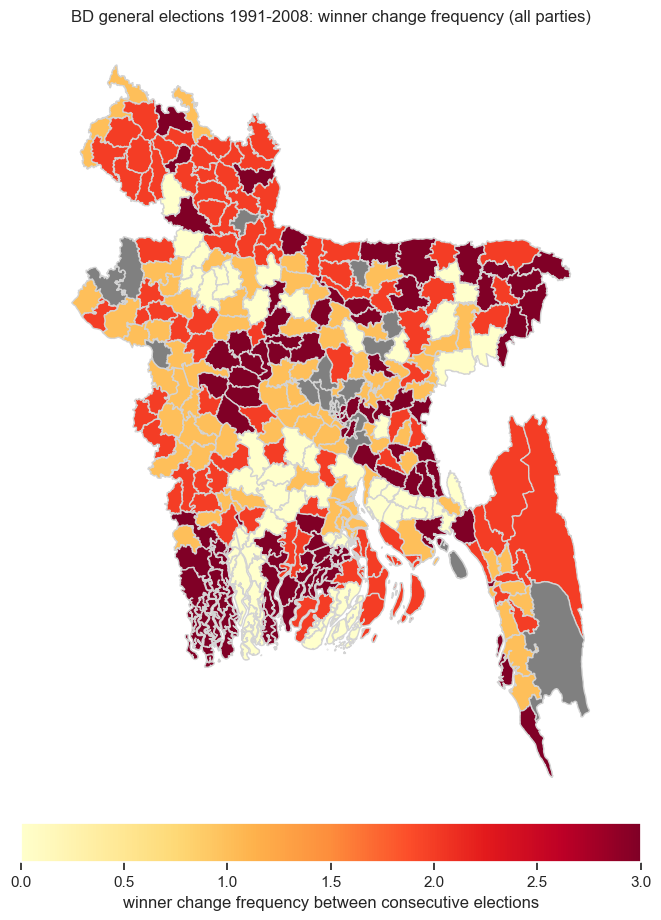

In [34]:
# plot map
fig, ax = plt.subplots(figsize=(8, 14))

divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)

map_change.plot(
    column='change_count', 
    cmap='YlOrRd', 
    edgecolor='lightgrey',
    legend=True, 
    ax=ax,
    cax=cax,
    legend_kwds={
    'label': 'winner change frequency between consecutive elections',
    'orientation': 'horizontal'
    },
    missing_kwds={
        "color": "grey",
        "label": "Missing values",
    }
)
ax.set_axis_off()
ax.title.set_text("BD general elections 1991-2008: winner change frequency (all parties)")
fig.savefig('fig/allp_win_change',bbox_inches='tight')

In [49]:
# save interactive map
fol = map_change.explore(
    column="change_count", 
    tooltip="change_count", 
    popup=True, 
    cmap='plasma', 
    style_kwds=dict(color="lightgrey"), 
)

fol.save('mapout/allp_win_change.html')